In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#separating features and label
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
#Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [6]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [10]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  """
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [11]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

# list all data in history

print(model_history.history.keys())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 388us/step - loss: 0.6879 - accuracy: 0.6328 - val_loss: 0.5261 - val_accuracy: 0.7970
Epoch 2/100
5359/5359 [==============================] - 2s 293us/step - loss: 0.4936 - accuracy: 0.8011 - val_loss: 0.4764 - val_accuracy: 0.7959
Epoch 3/100
5359/5359 [==============================] - 2s 298us/step - loss: 0.4597 - accuracy: 0.8003 - val_loss: 0.4541 - val_accuracy: 0.7993
Epoch 4/100
5359/5359 [==============================] - 3s 526us/step - loss: 0.4383 - accuracy: 0.8084 - val_loss: 0.4391 - val_accuracy: 0.8099
Epoch 5/100
5359/5359 [==============================] - 3s 503us/step - loss: 0.4222 - accuracy: 0.8166 - val_loss: 0.4268 - val_accuracy: 0.8145
Epoch 6/100
5359/5359 [==============================] - 3s 492us/step - loss: 0.4095 - accuracy: 0.8229 - val_loss: 0.4167 - val_accuracy: 0.8175
Epoch 7/100
5359/5359 [==============================] - 3s 501us/step

5359/5359 [==============================] - 2s 321us/step - loss: 0.3391 - accuracy: 0.8586 - val_loss: 0.3715 - val_accuracy: 0.8402
Epoch 57/100
5359/5359 [==============================] - 2s 319us/step - loss: 0.3392 - accuracy: 0.8574 - val_loss: 0.3706 - val_accuracy: 0.8425
Epoch 58/100
5359/5359 [==============================] - 2s 321us/step - loss: 0.3389 - accuracy: 0.8574 - val_loss: 0.3709 - val_accuracy: 0.8417
Epoch 59/100
5359/5359 [==============================] - 2s 329us/step - loss: 0.3387 - accuracy: 0.8589 - val_loss: 0.3712 - val_accuracy: 0.8425
Epoch 60/100
5359/5359 [==============================] - 2s 304us/step - loss: 0.3386 - accuracy: 0.8574 - val_loss: 0.3706 - val_accuracy: 0.8429
Epoch 61/100
5359/5359 [==============================] - 2s 319us/step - loss: 0.3383 - accuracy: 0.8593 - val_loss: 0.3705 - val_accuracy: 0.8436
Epoch 62/100
5359/5359 [==============================] - 2s 308us/step - loss: 0.3383 - accuracy: 0.8576 - val_loss: 0.3705 

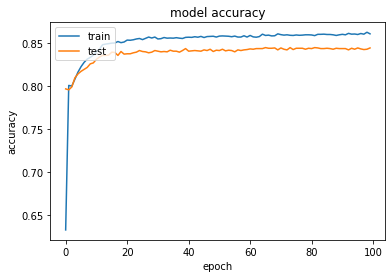

In [14]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

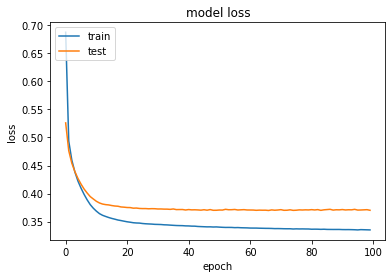

In [15]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)


In [19]:
cm

array([[1526,   69],
       [ 216,  189]], dtype=int64)

In [20]:
score

0.8575